In [1]:
# Kernel: Python 3.11.5
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.io
import datetime
import statistics

In [3]:
# Load and filter the first CSV file
filename1 = "..\input_data\IC-FlumeUp-15_2013-2014-2015_Q_C_S_SpC_T (1).csv"
df1 = pd.read_csv(filename1)
filtered_df1 = df1[(df1['Q_flume'] >= 1E-15) & (df1['Q_flume'] <= 10e4)]
filtered_df1['DateTimeUTC'] = pd.to_datetime(filtered_df1['DateTimeUTC'])

# Load and filter the second Excel file
filename2 = "..\input_data\IC Flume Discharge 2016.xlsx"
df2 = pd.read_excel(filename2)
filtered_df2 = df2[(df2['Q_flume'] >= 1E-15) & (df2['Q_flume'] <= 10e4)]
filtered_df2['DateTimeUTC'] = pd.to_datetime(filtered_df2['DateTimeUTC'])

# Add Year column
filtered_df1['Year'] = filtered_df1['DateTimeUTC'].dt.year
filtered_df2['Year'] = filtered_df2['DateTimeUTC'].dt.year

# Concatenate the dataframes
combined_df = pd.concat([filtered_df1, filtered_df2])

# Filter for specific years and date range
years = [2013, 2014, 2016]
combined_df = combined_df[combined_df['Year'].isin(years)]
combined_df = combined_df[combined_df['DateTimeUTC'].between(combined_df['Year'].astype(str) + '-07-01', combined_df['Year'].astype(str) + '-08-12')]
combined_df['Minute_of_Year'] = (combined_df['DateTimeUTC'] - pd.to_datetime(combined_df['Year'].astype(str) + '-07-01')) / pd.Timedelta(minutes=1)

# Read the model data
oc = pd.read_csv('..\output_data\Q_gw_Pool2_model_revisionB.csv', header=None)
# oc[0] = np.log10(oc[0]) 

C:\Users\nm32873\AppData\Local\Temp\ipykernel_233412\2166332022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['DateTimeUTC'] = pd.to_datetime(filtered_df1['DateTimeUTC'])
C:\Users\nm32873\AppData\Local\Temp\ipykernel_233412\2166332022.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Year'] = filtered_df1['DateTimeUTC'].dt.year


c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


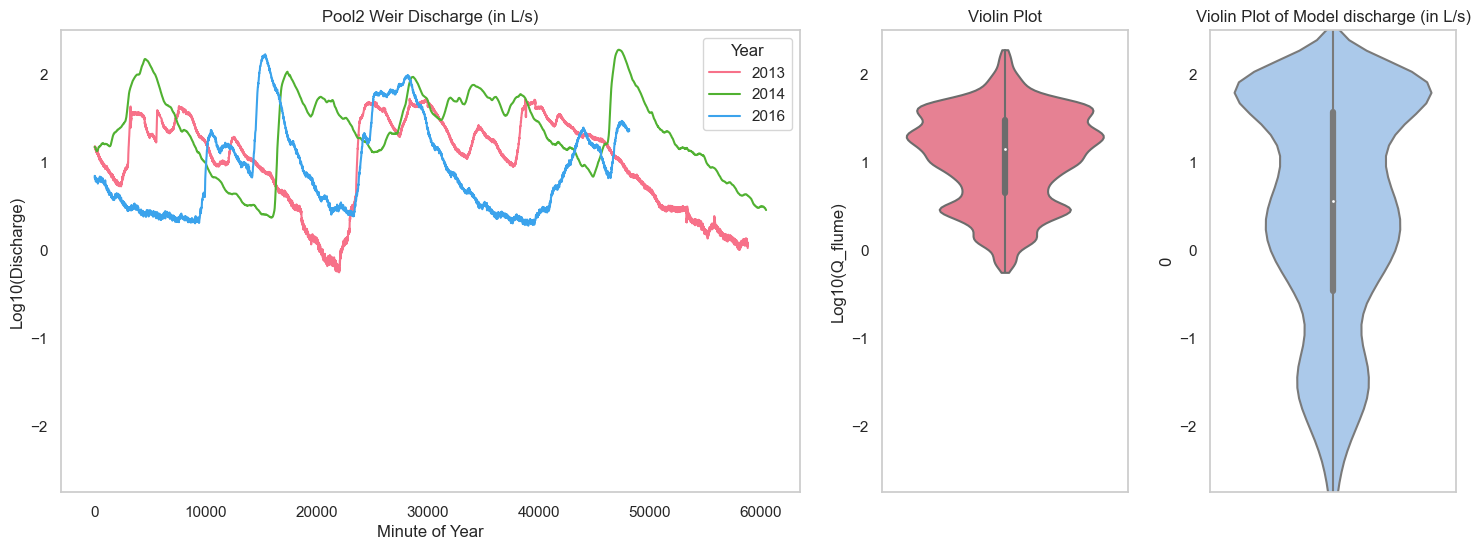

In [3]:
# Define color palette and map to years
palette = sns.color_palette("husl", len(years))
year_color_map = dict(zip(years, palette))

fig, ax = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1.5, 0.5, 0.5]}) 

# Plot the time series data
for year in years:
    data_year = combined_df[combined_df['Year'] == year]
    ax[0].plot(data_year['Minute_of_Year'], np.log10(data_year['Q_flume']), label=f'{year}', color=year_color_map[year])
ax[0].set_ylim(-2.75, 2.5)
ax[0].legend(title='Year')
ax[0].set_ylabel('Log10(Discharge)')
ax[0].set_xlabel('Minute of Year')
ax[0].set_title('Pool2 Weir Discharge (in L/s)')
ax[0].grid(False)

# Violin plot for discharge per year with consistent colors
sns.violinplot(ax=ax[1], data=combined_df['Q_flume'], y=np.log10(combined_df['Q_flume']), palette=palette, dodge=False, width=0.8, cut = 0)
ax[1].set_title('Violin Plot')
ax[1].set_ylabel('Log10(Q_flume)')
ax[1].set_ylim(-2.75, 2.5)
ax[1].grid(False)


# Violin plot for model data with increased width
oc = oc.loc[oc[0] != 0]
sns.violinplot(ax=ax[2], y=np.log10(oc[0]), palette="pastel", dodge=False, width=0.8, cut = 0)
ax[2].set_title('Violin Plot of Model discharge (in L/s)')
ax[2].set_ylim(-2.75, 2.5)
ax[2].grid(False)
plt.show()
# fig.savefig('Stack_discharge_Pool2_comparison.pdf', format='pdf', dpi=1200)
#
# fig.savefig('UpstreamWeir_discharge_comparison_allyears_updated_revisionB.pdf', format='pdf', dpi=1200)

In [4]:

# Print quantiles
for year in years:
    data_year = combined_df[(combined_df['Year'] == year) & 
                            (combined_df['DateTimeUTC'].between(f"{year}-07-01", f"{year}-08-12"))]['Q_flume']
    print(f"Quantiles for {year}: {np.quantile(data_year, [0.25, 0.5, 0.75])} ")
    print(f"Max for {year}: {np.max(data_year)}")
    print(f"Min for {year}: {np.min(data_year)}")

quantile_all_years_pool2 = combined_df['Q_flume'].quantile([0.25,0.50,0.75])
print(f"Quartiles for combined discharge: Q1={(quantile_all_years_pool2.loc[0.25])}, Q2={(quantile_all_years_pool2.loc[0.5])}, Q3={(quantile_all_years_pool2.loc[0.75])}")
quartiles_ax2 = oc[0].quantile([0.25, 0.5, 0.75])
print(f"Quartiles for modelled discharge: Q1={(quartiles_ax2.loc[0.25])}, Q2={(quartiles_ax2.loc[0.5])}, Q3={(quartiles_ax2.loc[0.75])}")
max_ax2 = oc[0].max()
min_ax2 = oc[0].min()
print(f"min and max for modelled discharge: max={(max_ax2)}, min={min_ax2}")

Quantiles for 2013: [ 4.17631056 12.65480097 26.20092496] 
Max for 2013: 52.61998458
Min for 2013: 0.561036529
Quantiles for 2014: [12.1863 23.277  51.1163] 
Max for 2014: 189.9968
Min for 2014: 2.3515
Quantiles for 2016: [ 2.91558923  6.84597827 17.77071192] 
Max for 2016: 168.64156040110464
Min for 2016: 1.9013861110734929
Quartiles for combined discharge: Q1=4.426363003362776, Q2=13.997158790427411, Q3=29.8614872775
Quartiles for modelled discharge: Q1=0.34606648976843274, Q2=3.637825520953905, Q3=37.0675574959132
min and max for modelled discharge: max=2918.74313761175, min=-480.464519213861


In [5]:
count = np.sum((oc[0] >= 0.56) & (oc[0] <= 189.9968))
count

5852836